# Создание собственного распределения

Размер выборки: 10000
Первые 10 значений: [2.42189741 3.88265561 3.35430885 3.11779466 3.38899601 3.05809754
 3.97042334 3.4321148  3.83057718 3.21988357]

Проверка нормировки плотности:
∫f(x)dx на [0.0, 4.0] = 1.000000 (ошибка: 1.11e-14)

Проверка в граничных точках:
F(0.0) = 0.000000
F(4.0) = 1.000000

Вероятность попадания случайной величины в некоторый интервал
P(1 <= X <= 3) = 0.3125

*************ЧИСЛОВЫЕ ХАРАКТЕРИСТИКИ**************
Математическое ожидание: 3.2000
Медиана: 3.3636
Дисперсия: 0.4267
Стандартное отклонение: 0.6532
Статистики:
	Среднее: 3.2000
	Дисперсия: 0.4267
	Асимметрия: -1.0498
	Эксцесс: 0.6964

50%-квантиль: 3.3636
75%-точка: 2.8284


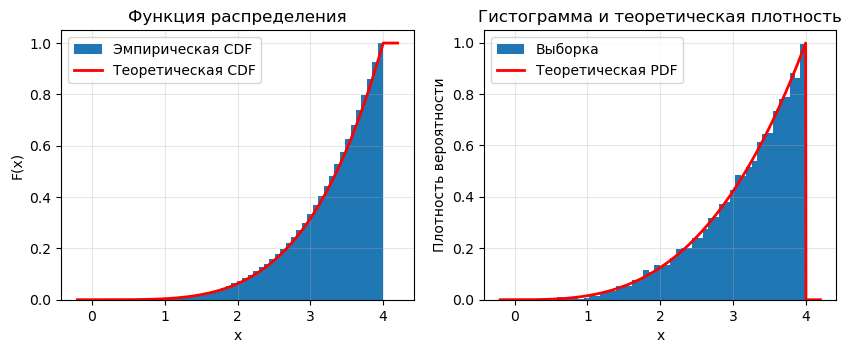

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_continuous
from scipy import integrate

class CustomDistribution(rv_continuous):
    def __init__(self, a, b):
        super().__init__(a=a, b=b, name='custom_dist')
    def _pdf(self, x):
        res = np.zeros_like(x)
        res[(x >= self.a) & (x <= self.b)] = 1 / 64 * x ** 3
        return res
        
    def _cdf(self, x):
        result = np.zeros_like(x)
        result[x < self.a] = 0
        result[(x >= self.a) & (x <= self.b)] = x ** 4 / 256
        result[x > self.b] = 1
        return result

    def _ppf(self, q):
        return (256 * q) ** 0.25
        
a, b = 0.0, 4.0
custom_dist = CustomDistribution(a, b)

sample = custom_dist.rvs(size=10000)

print(f"Размер выборки: {len(sample)}")
print(f"Первые 10 значений: {sample[:10]}\n")

x_test = np.linspace(a - 0.5, b + 0.5, 100)
pdf_values = custom_dist.pdf(x_test)
cdf_values = custom_dist.cdf(x_test)

print("Проверка нормировки плотности:")
integral, error = integrate.quad(custom_dist.pdf, a, b)
print(f"∫f(x)dx на [{a}, {b}] = {integral:.6f} (ошибка: {error:.2e})")

print("\nПроверка в граничных точках:")
print(f"F({a}) = {custom_dist.cdf(a):.6f}")
print(f"F({b}) = {custom_dist.cdf(b):.6f}\n")

inter = [1, 3]
probobility = custom_dist.cdf(inter[1]) - custom_dist.cdf(inter[0])
print("Вероятность попадания случайной величины в некоторый интервал")
print(f"P({inter[0]} <= X <= {inter[1]}) = {probobility:.4f}\n")

print("ЧИСЛОВЫЕ ХАРАКТЕРИСТИКИ".center(50, '*'))
print(f"Математическое ожидание: {custom_dist.mean():.4f}")
print(f"Медиана: {custom_dist.median():.4f}")
print(f"Дисперсия: {custom_dist.var():.4f}")
print(f"Стандартное отклонение: {custom_dist.std():.4f}")
print("Статистики:")
stats = custom_dist.stats(moments='mvsk')
print(f"\tСреднее: {stats[0]:.4f}")
print(f"\tДисперсия: {stats[1]:.4f}")
print(f"\tАсимметрия: {stats[2]:.4f}")
print(f"\tЭксцесс: {stats[3]:.4f}")

print(f"\n50%-квантиль: {custom_dist.ppf(0.50):.4f}")
print(f"75%-точка: {custom_dist.ppf(0.25):.4f}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3.5))
x_plot = np.linspace(a - 0.2, b + 0.2, 1000)

ax1.hist(sample, bins=50, density=True, cumulative=True, label='Эмпирическая CDF')
ax1.plot(x_plot, custom_dist.cdf(x_plot), 'r-', linewidth=2, label='Теоретическая CDF')
ax1.set_xlabel('x')
ax1.set_ylabel('F(x)')
ax1.set_title('Функция распределения')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.hist(sample, bins=50, density=True, label='Выборка')
ax2.plot(x_plot, custom_dist.pdf(x_plot), 'r-', linewidth=2, label='Теоретическая PDF')
ax2.set_xlabel('x')
ax2.set_ylabel('Плотность вероятности')
ax2.set_title('Гистограмма и теоретическая плотность')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.show()